<a href="https://colab.research.google.com/github/zahra-teb/ML-Projects/blob/main/Supermarket%20Customer%20Segmentation/EDA%20and%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, k_means, DBSCAN
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [ ]:
!cd /content/drive/MyDrive/

In [ ]:
!kaggle datasets download -d hunter0007/ecommerce-dataset-for-predictive-marketing-2023

 33% 5.00M/15.2M [00:00<00:00, 38.2MB/s]
100% 15.2M/15.2M [00:00<00:00, 91.6MB/s]


In [ ]:
!mkdir data

In [ ]:
!unzip ecommerce-dataset-for-predictive-marketing-2023.zip -d data

Archive:  ecommerce-dataset-for-predictive-marketing-2023.zip
  inflating: data/ECommerce_consumer behaviour.csv  


In [ ]:
df = pd.read_csv('/content/data/ECommerce_consumer behaviour.csv')
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [ ]:
list(df.columns)

['order_id',
 'user_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'department_id',
 'department',
 'product_name']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [ ]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [ ]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

Column 'days_since_prior_order' has plenty of missing values!

In [ ]:
# taking care of missing values
df['days_since_prior_order'].fillna(-1,inplace=True)

In [ ]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [ ]:
df['days_since_prior_order'].unique()

array([-1.,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

Since they're all integer values, we convert the data type:

In [ ]:
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


**Outliers**

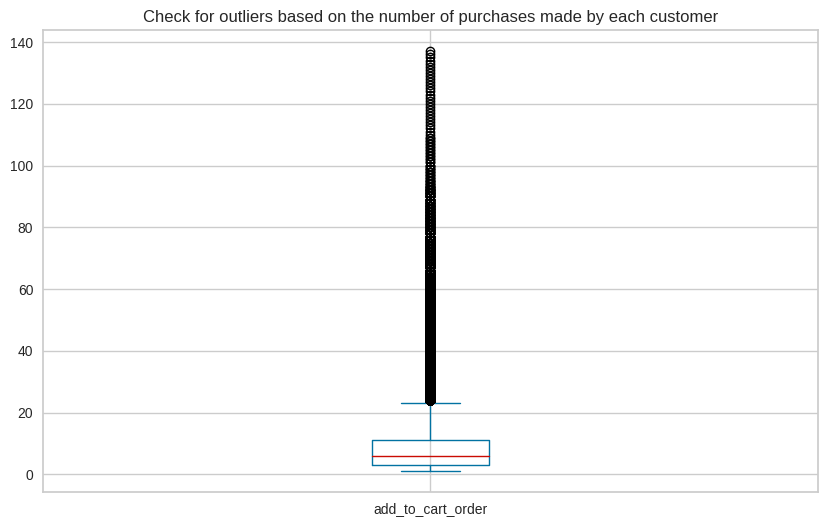

In [ ]:
df['add_to_cart_order'].plot(kind='box', figsize=(10,6))
plt.title('Check for outliers based on the number of purchases made by each customer')
plt.show()

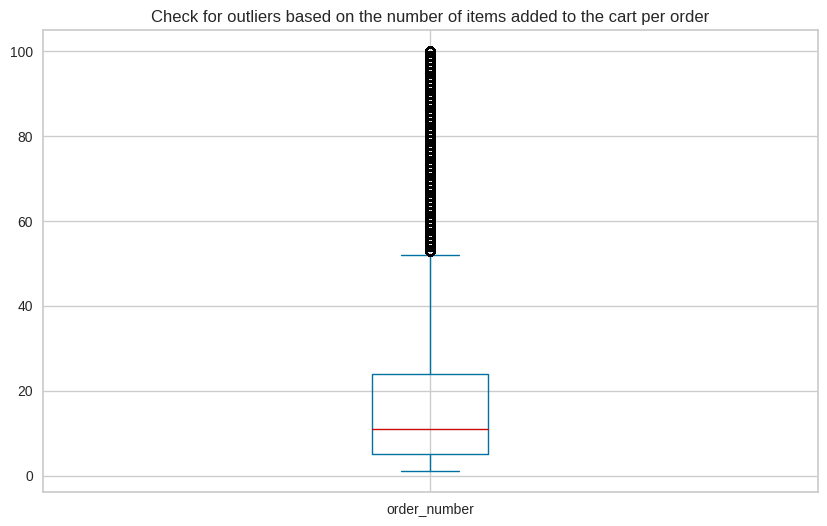

In [ ]:
df['order_number'].plot(kind='box', figsize=(10,6))
plt.title('Check for outliers based on the number of items added to the cart per order')
plt.show()

In [ ]:
for column in df:
    print(column,":\n",df[column].unique(),'\n')

order_id :
 [2425083 1944304 1201011 ...  792803 3390742  458285] 

user_id :
 [ 49125 162867 147243 ...   9022  58669  96893] 

order_number :
 [  1  14  81   3  11   5  12  78   2  10  13   8   6   4  23  59  25  36
  19   7  63  51  28   9  18  27  61  30  91  46  21  42  16  41  62  32
  52  20  56  15  68  33  50  38  17  55  44  26  72  67  29  45  58  43
  34  66  35  47  53  48  24  31  77  22  57  93  86  80  40  39  82  74
  49  37  71  69  70  60 100  96  75  87  90  54  98  65  76  83  84  79
  92  97  64  73  95  88  85  89  99  94] 

order_dow :
 [2 3 0 1 6 5 4] 

order_hour_of_day :
 [18 17 16 11 10  1  8  6  2  9 12 13 14 19 21 15 20  7 22  4 23  0  5  3] 

days_since_prior_order :
 [-1  3  6  7 30 20  4  8 15 10 28  9 12 11  2 25 13 29 14 21  5  1 18  0
 19 17 22 26 24 16 23 27] 

product_id :
 [ 17  91  36  83 120  59  35  37  24  84  21 112  94   8  52 121  86  43
  53 115 110  49 108  29  26  31   3  77  30 111  54  20  56  85 117  25
 123 106  96 107 122  67   1  7

In [ ]:
df1 = df[['product_id', 'product_name', 'department_id', 'department']]
df1

,product_id,product_name,department_id,department
0,17,baking ingredients,13,pantry
1,91,soy lactosefree,16,dairy eggs
2,36,butter,16,dairy eggs
3,83,fresh vegetables,4,produce
4,83,fresh vegetables,4,produce
...,...,...,...,...
2019496,83,fresh vegetables,4,produce
2019497,115,water seltzer sparkling water,7,beverages
2019498,32,packaged produce,4,produce
2019499,32,packaged produce,4,produce


'department' and 'product_name' have corresponding numeric columns.

In [ ]:
df['user_id'].nunique()

105273

There are about 105k unique users.

In [ ]:
g = df.groupby('order_dow')
g.first()

,order_id,user_id,order_number,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
order_dow,,,,,,,,,,,
0,1201011,147243,14,16,3,94,1,0,7,beverages,tea
1,1906860,195275,81,11,3,83,1,1,4,produce,fresh vegetables
2,2425083,49125,1,18,-1,17,1,0,13,pantry,baking ingredients
3,1944304,162867,1,17,-1,37,1,0,1,frozen,ice cream ice
4,414169,88200,10,18,8,27,1,1,5,alcohol,beers coolers
5,3195784,120094,11,17,7,29,1,0,13,pantry,honeys syrups nectars
6,2766469,58222,3,11,6,53,1,1,16,dairy eggs,cream


array([<Axes: ylabel='count'>], dtype=object)

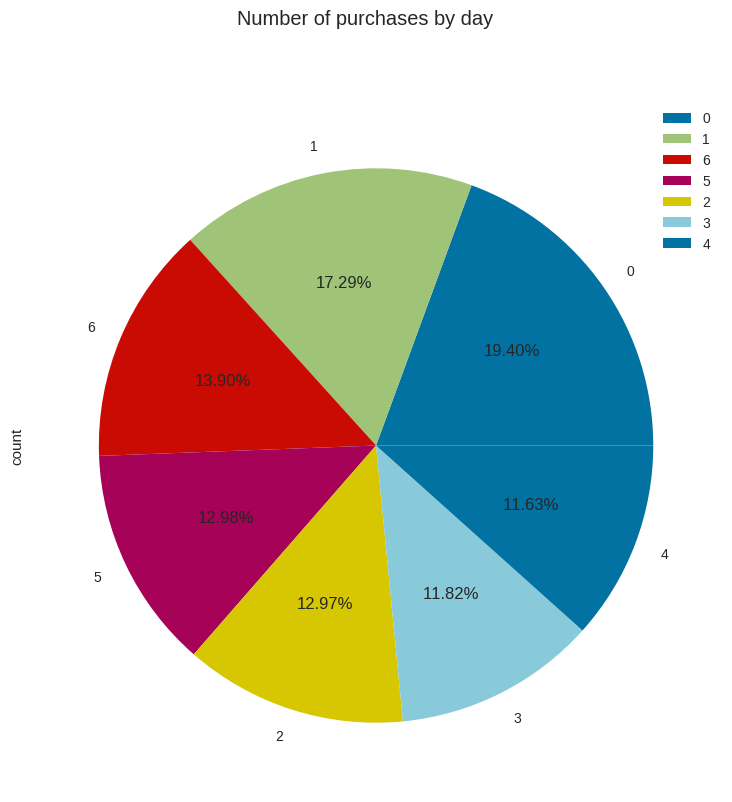

In [ ]:
df.groupby('order_dow')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Number of purchases by day',figsize=(9,9))

In [ ]:
def order_time(x):
   if x in [6,7,8,9,10,11,12]:
        return 'morning'
    if x in [13,14,15,16,17]:
        return 'afternoon'
    if x in [18,19,20,21,22]:
        return 'evening'
    if x in [23,24,0,1,2,3,4,5]:
        return 'night'
    return x

In [ ]:
df['order_part_of_day']=df['order_hour_of_day'].apply(order_time)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_part_of_day
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables,evening
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water,evening
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce,evening
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce,evening


array([<Axes: ylabel='count'>], dtype=object)

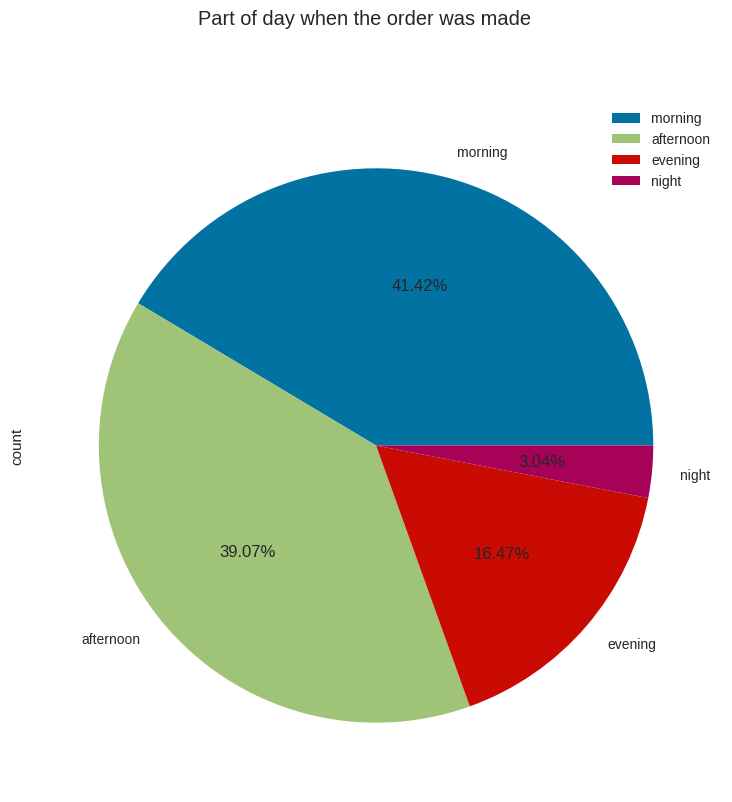

In [ ]:
df.groupby('order_part_of_day')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Part of day when the order was made',figsize=(9,9))

<Axes: title={'center': 'The time when the order was made by day and part of day'}, xlabel='order_dow'>

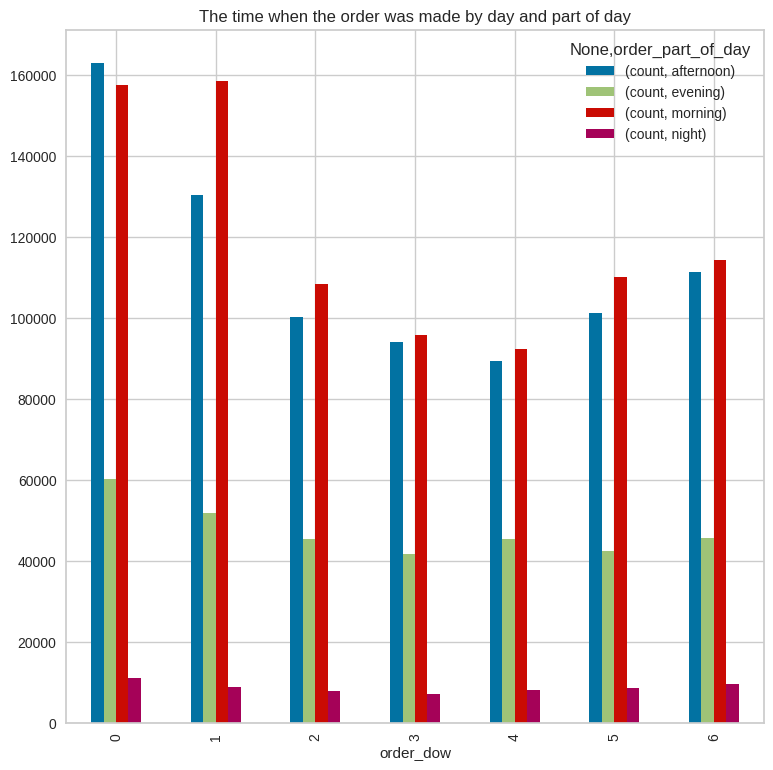

In [ ]:
df.pivot_table(index='order_dow',columns='order_part_of_day',values='user_id',aggfunc=['count']).plot(kind='bar',title='The time when the order was made by day and part of day',figsize=(9,9))

In [ ]:
def order_number_group(x):
    if x <= 20 :
        x= '1-20 orders'
    elif x >20 and x <=40:
        x= '21-40 orders'
    elif x >40 and x <=60:
        x= '41-60 orders'
    elif x >60 and x <=80:
        x= '61-80 orders'
    else:
        x= '81-100 orders'
    return x

In [ ]:
df['order_number_group']=df['order_number'].apply(order_number_group)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_part_of_day,order_number_group
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients,evening,1-20 orders
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree,evening,1-20 orders
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter,evening,1-20 orders
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables,evening,1-20 orders
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables,evening,1-20 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables,evening,1-20 orders
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water,evening,41-60 orders
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce,evening,41-60 orders
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce,evening,41-60 orders


array([<Axes: ylabel='count'>], dtype=object)

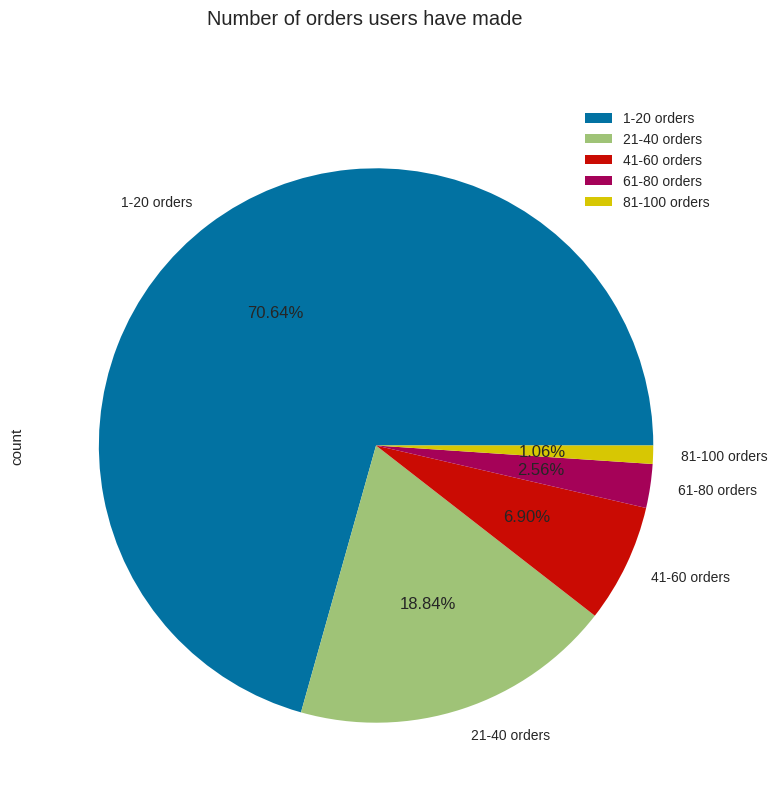

In [ ]:
df.groupby('order_number_group')['user_id'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Number of orders users have made',figsize=(9,9))

<Axes: title={'center': 'Days since prior order'}, xlabel='days_since_prior_order'>

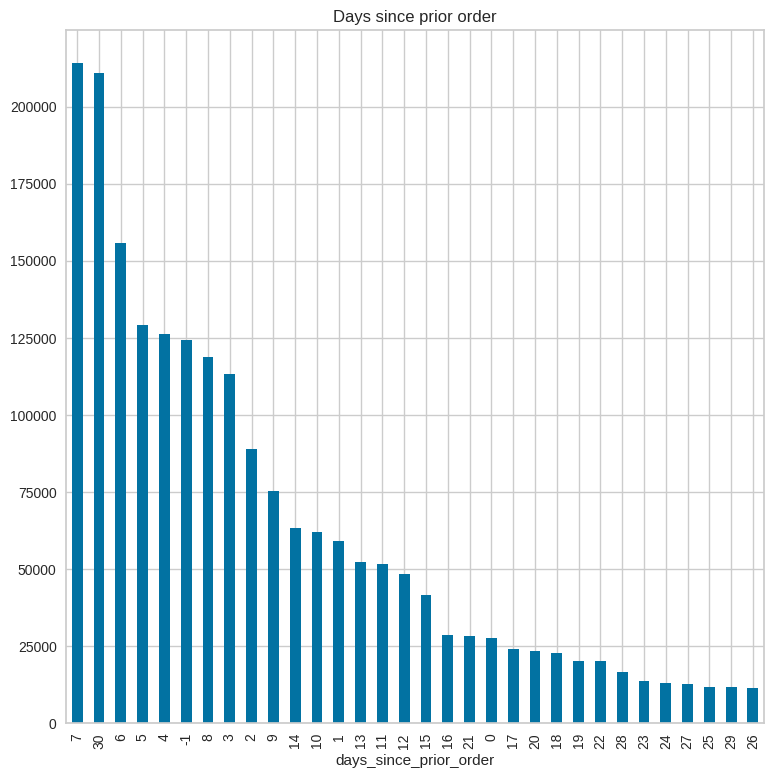

In [ ]:
df.groupby('days_since_prior_order')['user_id'].agg('count').sort_values(ascending=False).plot(kind='bar',title='Days since prior order',figsize=(9,9))

array([<Axes: ylabel='count'>], dtype=object)

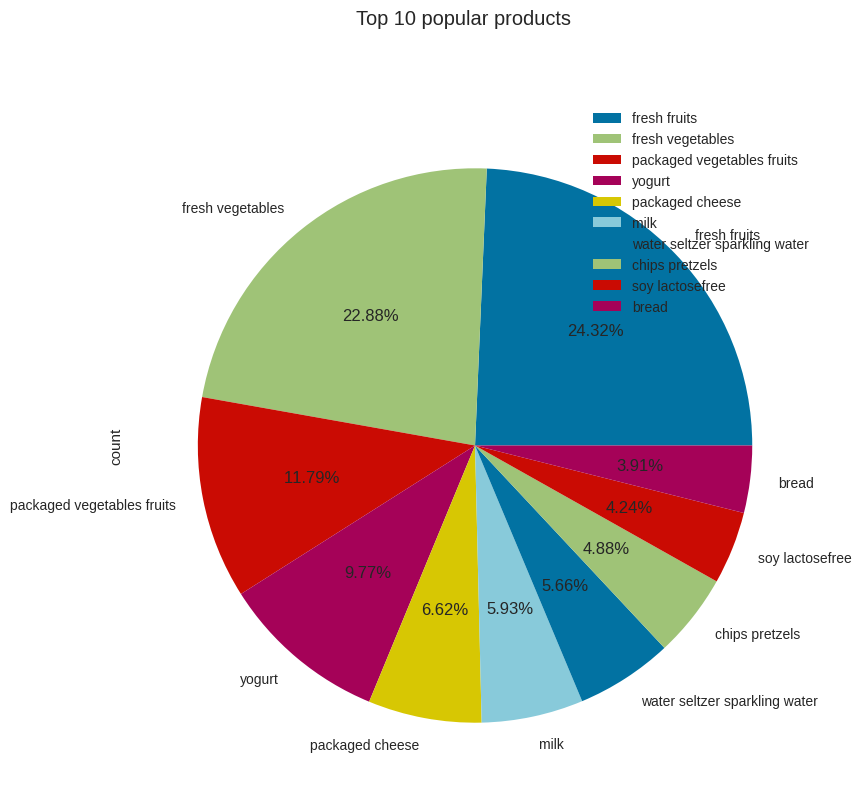

In [ ]:
f.groupby('product_name')['user_id'].agg(['count']).sort_values(by='count',ascending=False).head(10).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Top 10 popular products',figsize=(9,9))

In [ ]:
df['reordered'].value_counts()

1    1190986
0     828515
Name: reordered, dtype: int64

In more than half of the records, reorder happened.

<Axes: title={'center': 'Reordereds'}, ylabel='department'>

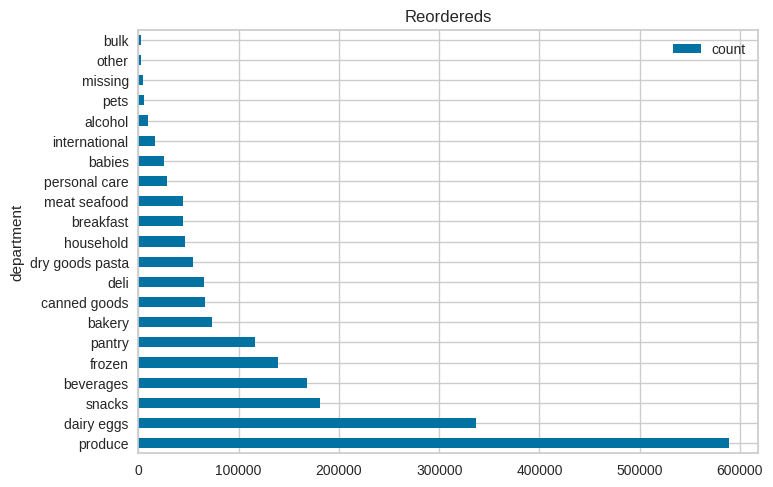

In [ ]:
df.groupby('department')['reordered'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh', title='Reordereds')


Reorder happened in the produce department the most.

array([<Axes: ylabel='count'>], dtype=object)

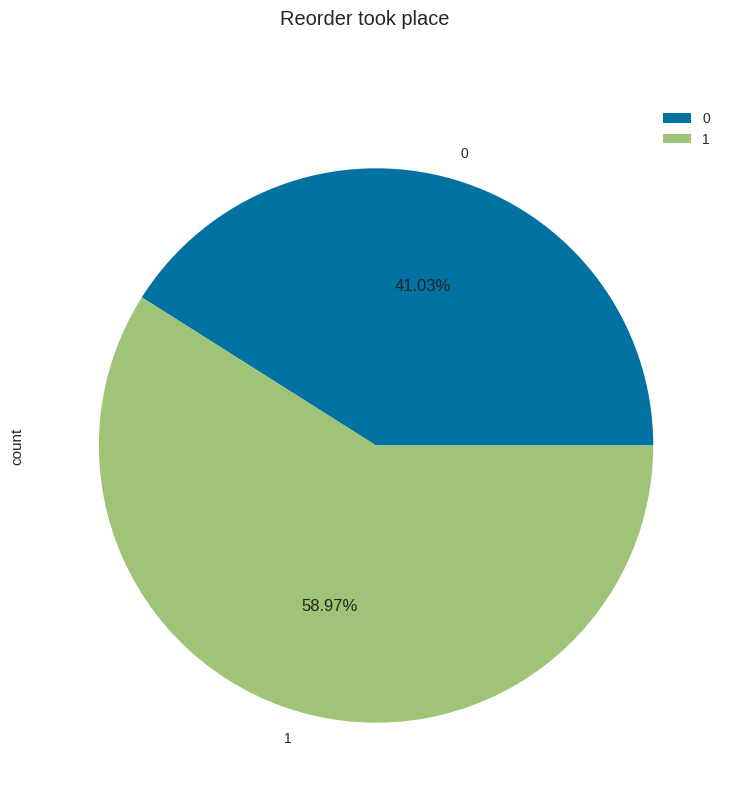

In [ ]:
df.groupby('reordered')['user_id'].agg(['count']).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Reorder took place',figsize=(9,9))

Near 60% of the users reordered!

array([<Axes: ylabel='count'>], dtype=object)

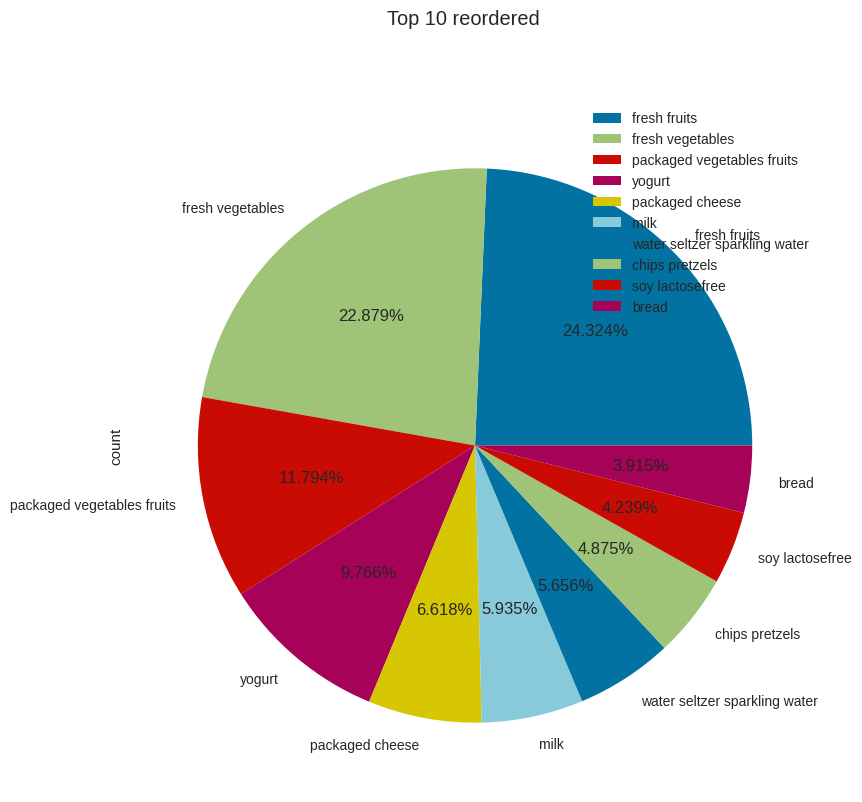

In [ ]:
df.groupby('product_name')['reordered'].agg(['count']).sort_values(by='count',ascending=False).head(10).plot(kind='pie',autopct='%1.3f%%',subplots=True,title='Top 10 reordered',figsize=(9,9))


Fresh fruits and vegeteble were the most products which had been reordered.

In [ ]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_part_of_day,order_number_group
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening,1-20 orders
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening,1-20 orders
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening,1-20 orders
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening,1-20 orders
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening,1-20 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening,1-20 orders
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening,41-60 orders
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening,41-60 orders
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening,41-60 orders


<Axes: >

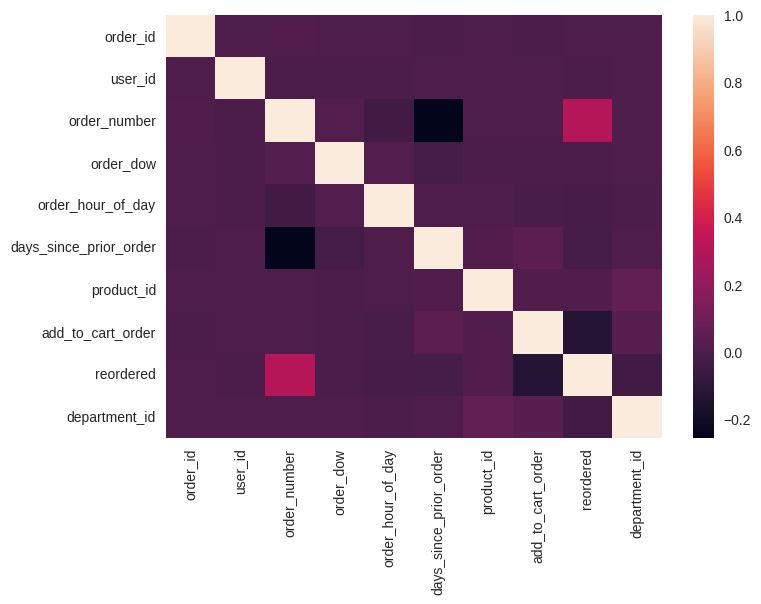

In [ ]:
sns.heatmap(df.corr())

**Clustering**

**K-means**

In [ ]:
data = df.iloc[:, :-4]

scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

another elbow:

In [ ]:
inertia = []
silhouette = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(scaled_df)
    k_in = kmeans.inertia_
    print("For", k, "clusters the distortion score is: ",kmeans.inertia_)
    inertia.append(k_in)
    labels = kmeans.fit_predict(scaled_df)
    k_s = silhouette_score(scaled_df, labels, sample_size=20000)
    silhouette.append(k_s)
    print("and the silhouette score is: ", k_s, '\n')


For 2 clusters the distortion score is:  17942986.938453034
and the silhouette score is:  0.11833986805417142 

For 3 clusters the distortion score is:  16708931.443918195
and the silhouette score is:  0.09904129184721466 

For 4 clusters the distortion score is:  15984013.37887412
and the silhouette score is:  0.08527548907289674 

For 5 clusters the distortion score is:  15073964.878996786
and the silhouette score is:  0.09512092171232665 

For 6 clusters the distortion score is:  14364615.127982892
and the silhouette score is:  0.08514807326824649 

For 7 clusters the distortion score is:  13882826.267126847
and the silhouette score is:  0.08443801419996676 

For 8 clusters the distortion score is:  13433598.414547242
and the silhouette score is:  0.09520499455622285 

For 9 clusters the distortion score is:  13127907.605772156
and the silhouette score is:  0.09021299137281881 

For 10 clusters the distortion score is:  12869767.557368085
and the silhouette score is:  0.090558764924

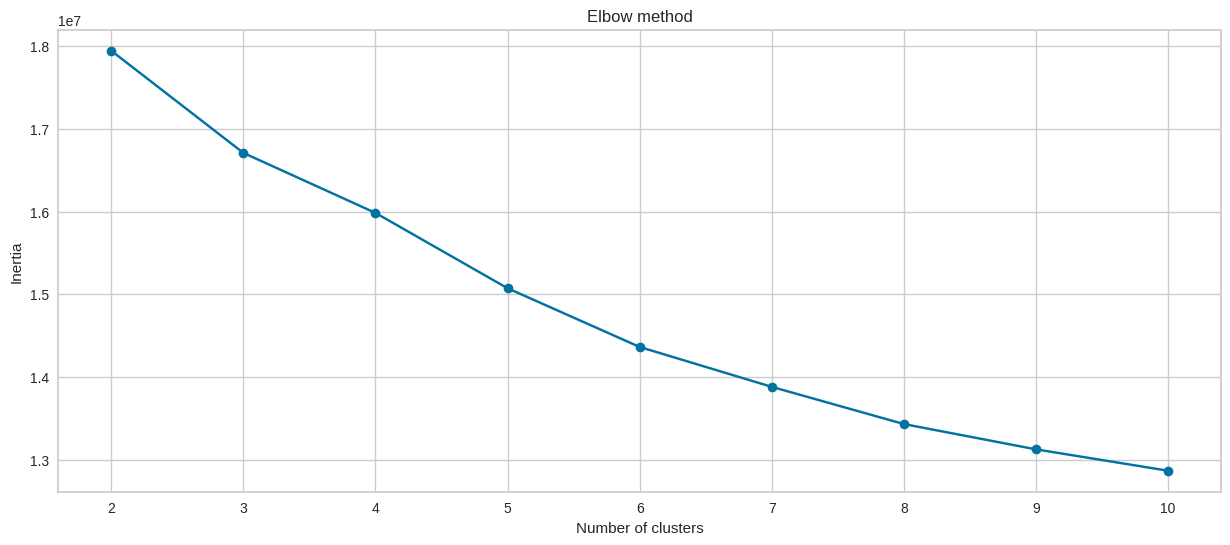

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method')
plt.show()

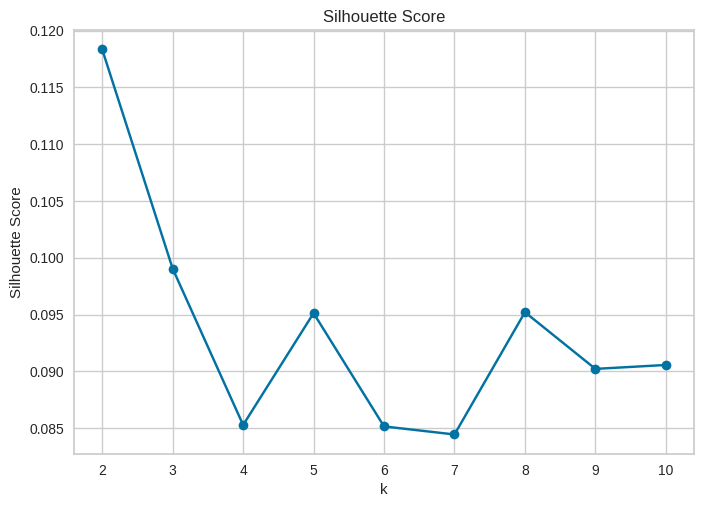

In [ ]:
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Based on plots above, k = 5 is appropriate.

In [ ]:
kmeans5 = KMeans(n_clusters = 5, n_init = 'auto')
kmeans5.fit_transform(scaled_df)

array([[4.49838022, 3.58428711, 3.5175523 , 2.64143416, 4.10036179],
       [4.3508464 , 3.59933361, 3.08000018, 2.36678893, 3.9284665 ],
       [4.39403243, 3.60161033, 3.21149482, 2.42606826, 3.97466702],
       ...,
       [2.77708571, 2.73397724, 3.47027589, 3.79020979, 4.33904438],
       [2.73480712, 2.70088673, 3.44078398, 3.75418566, 4.31000402],
       [2.83201154, 2.92828197, 3.4225303 , 3.83235481, 4.36919187]])

In [ ]:
data['cluster'] = kmeans5.labels_
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,cluster
0,2425083,49125,1,2,18,-1,17,1,0,13,3
1,2425083,49125,1,2,18,-1,91,2,0,16,3
2,2425083,49125,1,2,18,-1,36,3,0,16,3
3,2425083,49125,1,2,18,-1,83,4,0,4,3
4,2425083,49125,1,2,18,-1,83,5,0,4,3


In [ ]:
data['cluster'].value_counts()

3    602756
1    475013
2    397699
4    337561
0    206472
Name: cluster, dtype: int64

**2D and 3D visualization**

In [ ]:
pca = PCA(n_components=2, random_state=1).fit_transform(scaled_df)

df_pca = pd.DataFrame(data=pca, columns=['pc1', 'pc2'])

data_with_pcs = pd.concat([data.reset_index(drop=True), \
    pd.DataFrame(df_pca)], axis=1)

data_with_pcs.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,cluster,pc1,pc2
0,2425083,49125,1,2,18,-1,17,1,0,13,3,-0.574858,-0.686897
1,2425083,49125,1,2,18,-1,91,2,0,16,3,-0.659958,0.593515
2,2425083,49125,1,2,18,-1,36,3,0,16,3,-0.672743,-0.026500
3,2425083,49125,1,2,18,-1,83,4,0,4,3,-0.600882,-0.562975
4,2425083,49125,1,2,18,-1,83,5,0,4,3,-0.631877,-0.499028


<Axes: title={'center': 'KMeans-Ploting the clusters in 2D using PCA'}, xlabel='pc1', ylabel='pc2'>

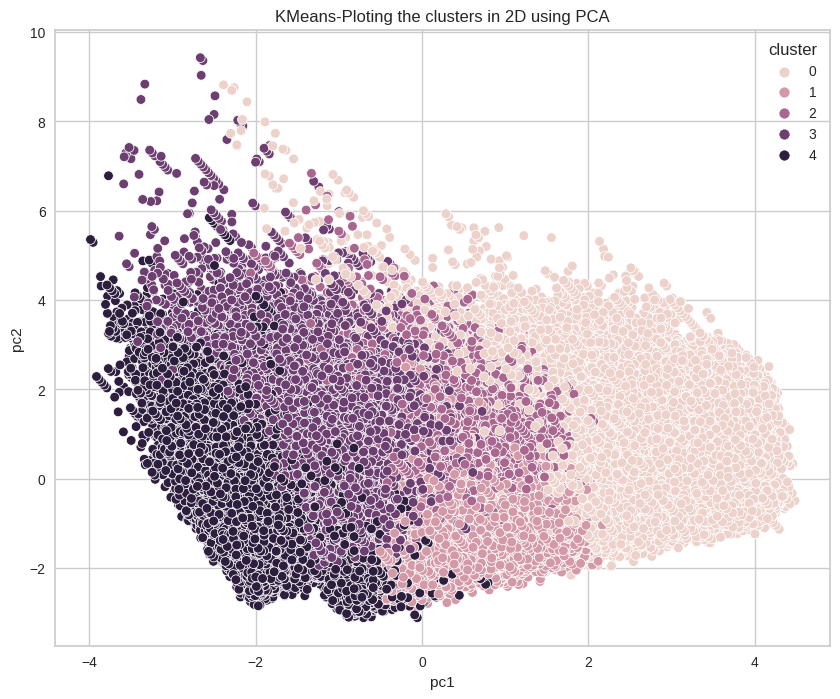

In [ ]:
plt.figure(figsize = (10,8))
plt.title('KMeans-Ploting the clusters in 2D using PCA')
sns.scatterplot(x='pc1', y='pc2', data=data_with_pcs, hue='cluster')

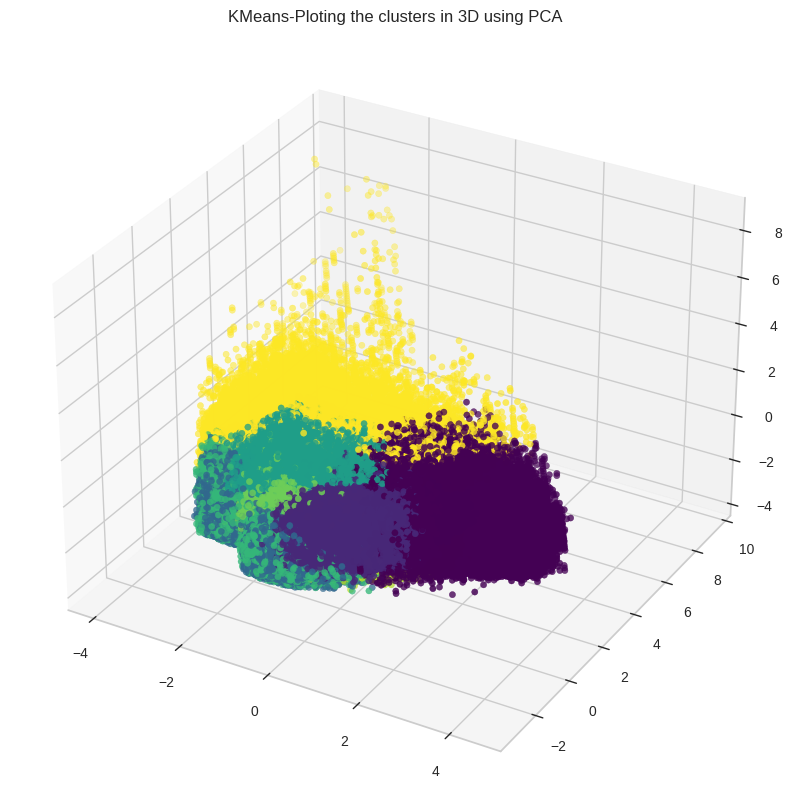

In [ ]:
pca = PCA(n_components=3, random_state=0)
pca_data = pca.fit_transform(scaled_df)

fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111, projection='3d')
plt.title('KMeans-Ploting the clusters in 3D using PCA')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=kmeans.labels_, cmap='viridis')
plt.show()

**DBSCAN**

In [ ]:
# get a sample from data cause the data is too large
sample_data = data.sample(n=20000, random_state=42)
sample_data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
794506,1253241,152060,6,1,20,23.0,115,2,1,7
1900056,3058717,44755,2,1,15,30.0,37,4,0,1
1986766,2252307,169119,12,4,15,9.0,123,19,0,4
794368,188072,162421,3,4,11,30.0,117,5,0,19
1623032,2627597,172693,19,0,23,5.0,17,8,0,13
...,...,...,...,...,...,...,...,...,...,...
405303,2032688,168827,5,6,14,7.0,116,23,0,1
12969,2280991,191436,23,4,18,7.0,83,8,1,4
640069,1214044,26235,12,3,18,16.0,69,11,0,15
825443,2555392,35649,18,0,18,3.0,32,14,0,4


In [ ]:
sample_data = sample_data.drop(columns=['cluster'])
sample_data

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
794506,1253241,152060,6,1,20,23,115,2,1,7
1900056,3058717,44755,2,1,15,30,37,4,0,1
1986766,2252307,169119,12,4,15,9,123,19,0,4
794368,188072,162421,3,4,11,30,117,5,0,19
1623032,2627597,172693,19,0,23,5,17,8,0,13
...,...,...,...,...,...,...,...,...,...,...
405303,2032688,168827,5,6,14,7,116,23,0,1
12969,2280991,191436,23,4,18,7,83,8,1,4
640069,1214044,26235,12,3,18,16,69,11,0,15
825443,2555392,35649,18,0,18,3,32,14,0,4


In [ ]:
#normalization
scaled_sample_data = scaler.fit_transform(sample_data)

To determine eps:

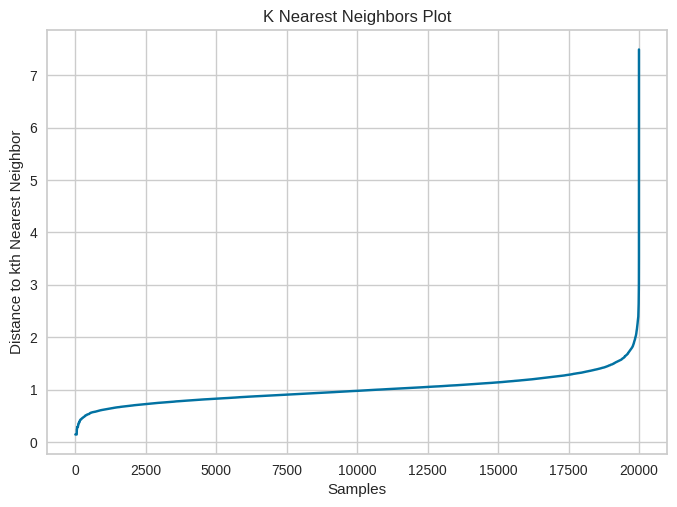

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 4).fit(scaled_sample_data)
distances, _ = nbrs.kneighbors(scaled_sample_data)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Consider the distances to the nearest neighbors (excluding the sample itself)
plt.plot(distances)
plt.xlabel('Samples')
plt.ylabel('Distance to kth Nearest Neighbor')
plt.title('K Nearest Neighbors Plot')
plt.show()

Elbow occured near 1.5. So we assign eps = 1.5

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan.fit(scaled_sample_data)

DBSCAN(eps=1.5, min_samples=10)

In [ ]:
dbscan.labels_

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
sample_data['cluster'] = dbscan.labels_
sample_data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,cluster
794506,1253241,152060,6,1,20,23,115,2,1,7,0
1900056,3058717,44755,2,1,15,30,37,4,0,1,1
1986766,2252307,169119,12,4,15,9,123,19,0,4,1
794368,188072,162421,3,4,11,30,117,5,0,19,1
1623032,2627597,172693,19,0,23,5,17,8,0,13,-1


In [ ]:
sample_data['cluster'].unique()

array([ 0,  1, -1,  2])

<Axes: title={'center': 'DBSCAN-Ploting the clusters in 2D using PCA'}, xlabel='pc1', ylabel='pc2'>

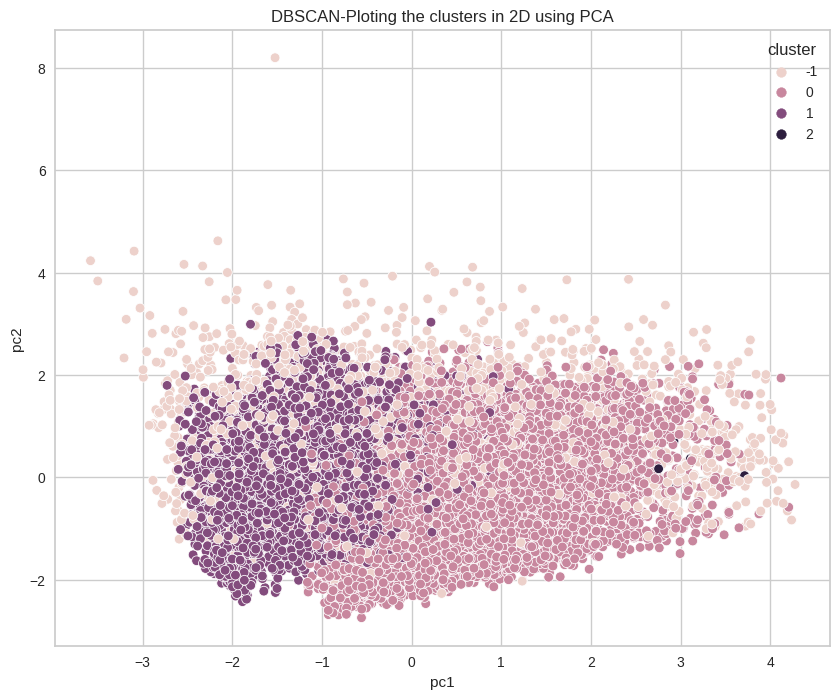

In [ ]:
pca = PCA(n_components=2, random_state=1).fit_transform(scaled_sample_data)

df_pca = pd.DataFrame(data=pca, columns=['pc1', 'pc2'])

data_with_pcs = pd.concat([sample_data.reset_index(drop=True), \
    pd.DataFrame(df_pca)], axis=1)


plt.figure(figsize = (10,8))
plt.title('DBSCAN-Ploting the clusters in 2D using PCA')
sns.scatterplot(x='pc1', y='pc2', data=data_with_pcs, hue='cluster')

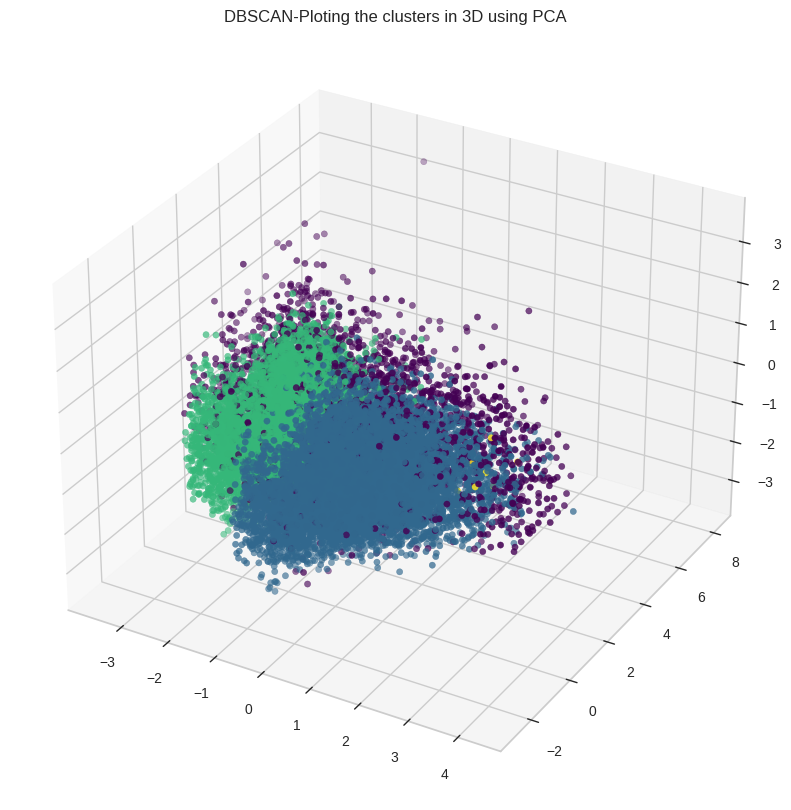

In [ ]:
pca = PCA(n_components=3, random_state=0)
pca_data = pca.fit_transform(scaled_sample_data)

fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111, projection='3d')
plt.title('DBSCAN-Ploting the clusters in 3D using PCA')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=dbscan.labels_, cmap='viridis')
plt.show()

**PCA**

In [ ]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_part_of_day,order_number_group
0,2425083,49125,1,2,18,-1.0,17,1,0,13,pantry,baking ingredients,evening,1-20 orders
1,2425083,49125,1,2,18,-1.0,91,2,0,16,dairy eggs,soy lactosefree,evening,1-20 orders
2,2425083,49125,1,2,18,-1.0,36,3,0,16,dairy eggs,butter,evening,1-20 orders
3,2425083,49125,1,2,18,-1.0,83,4,0,4,produce,fresh vegetables,evening,1-20 orders
4,2425083,49125,1,2,18,-1.0,83,5,0,4,produce,fresh vegetables,evening,1-20 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables,evening,1-20 orders
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water,evening,41-60 orders
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce,evening,41-60 orders
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce,evening,41-60 orders


In [ ]:
scaled_data = scaler.fit_transform(df.iloc[:, :-4])

In [ ]:
pca = PCA().fit(scaled_data)

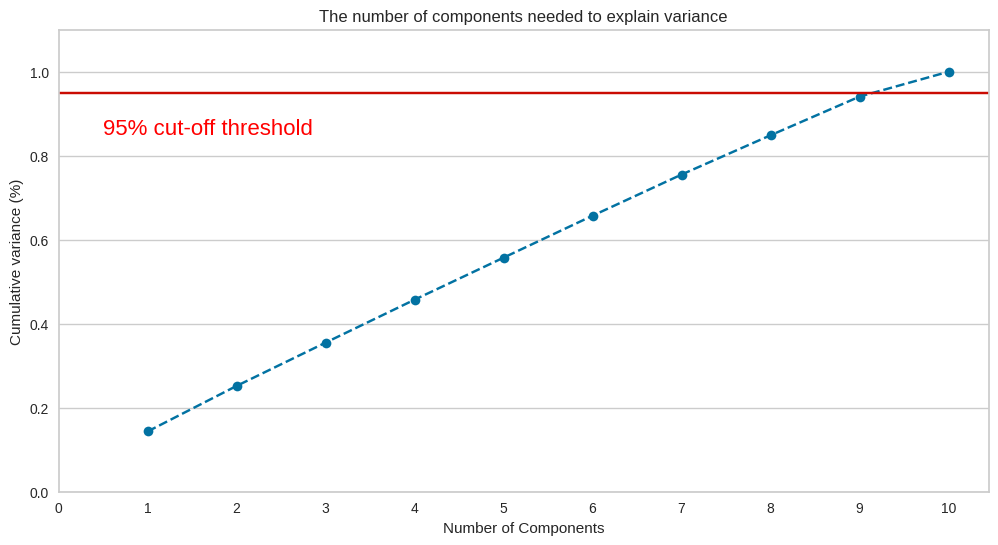

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Based on plot above, to get 95% of variance explained we need 9 principal components.

In [ ]:
pca = PCA(n_components=9, random_state=1).fit(scaled_data)
pca_data = pca.transform(scaled_data)

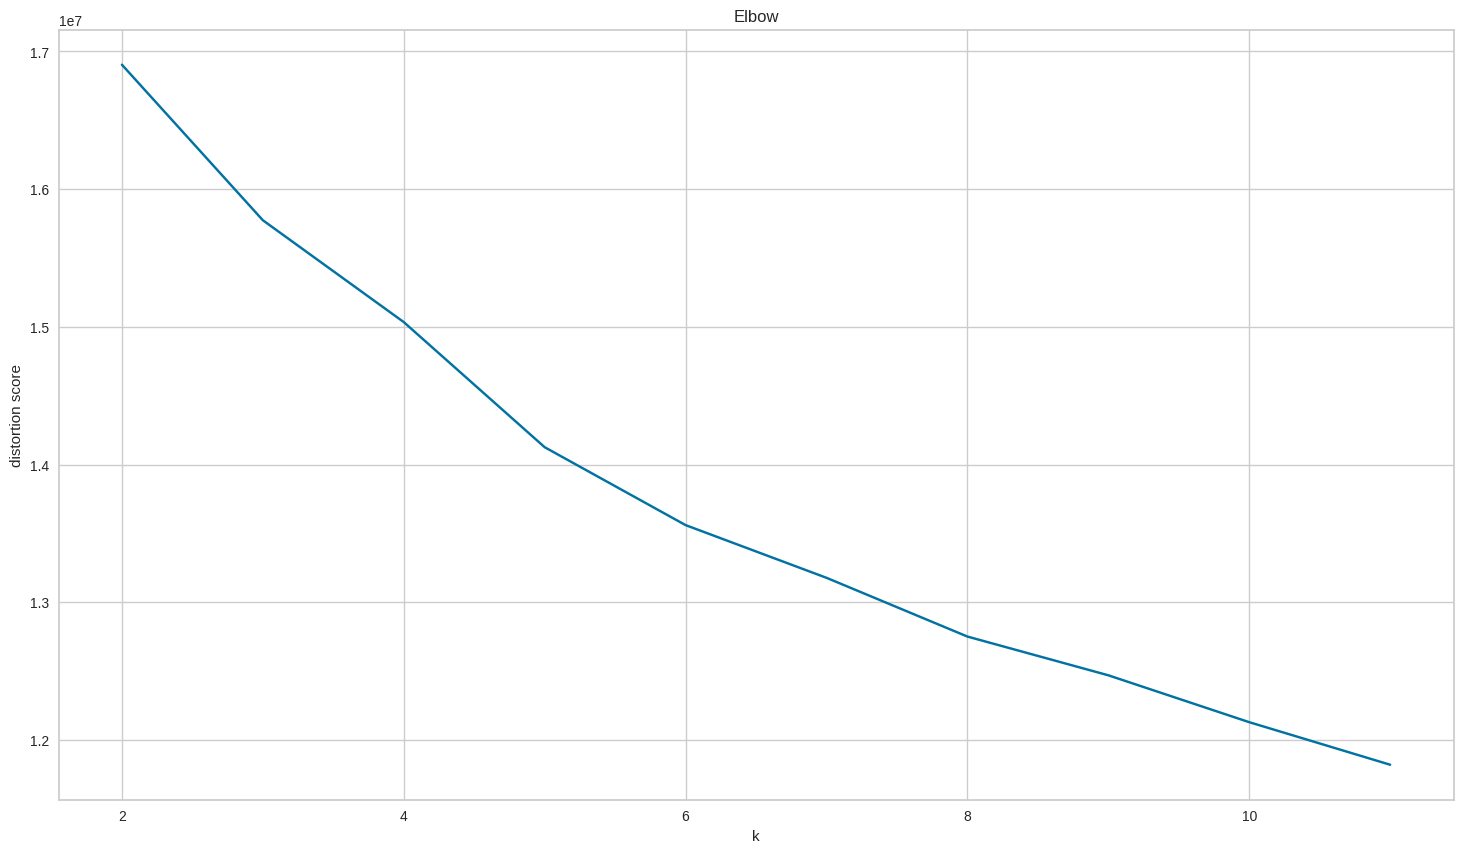

In [ ]:
distortions = []

for i in range(2,12):
    kmeans = KMeans(n_clusters = i, n_init='auto')
    kmeans.fit(pca_data)
    labels = kmeans.labels_
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(18,10))
plt.plot(range(2,12), distortions)
plt.title('Elbow')
plt.xlabel('k')
plt.ylabel('distortion score')
plt.show()


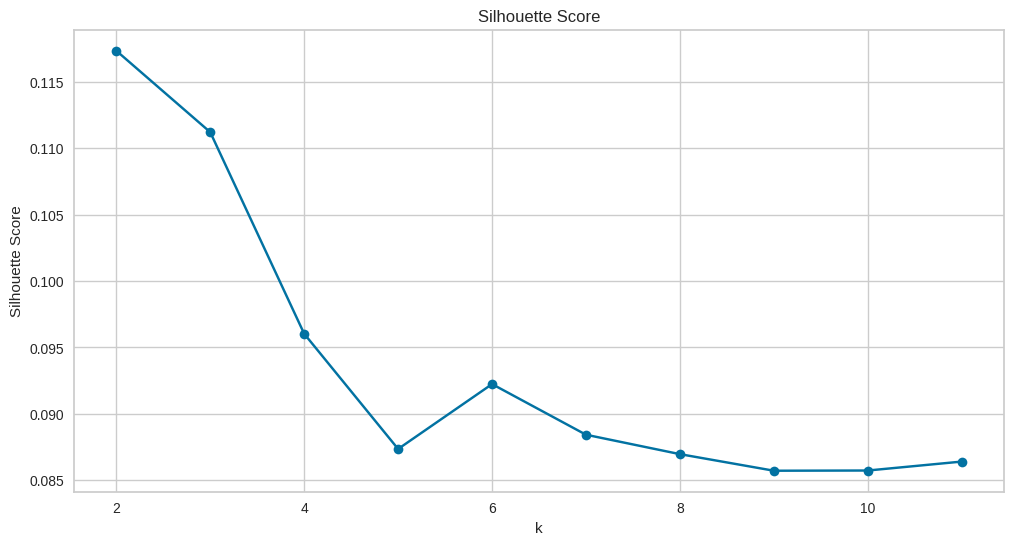

In [ ]:
silhouette = []

for i in range(2,12):
    kmeans = KMeans(n_clusters = i, n_init='auto')
    kmeans.fit(pca_data)
    labels = kmeans.labels_
    s = silhouette_score(scaled_df, labels, sample_size=20000)
    silhouette.append(s)

plt.plot(range(2, 12), silhouette, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(pca_data)

KMeans(n_clusters=6, n_init='auto')

In [ ]:
clusters = kmeans.labels_
df['cluster'] = clusters
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_part_of_day,order_number_group,cluster
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening,1-20 orders,5
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening,1-20 orders,5
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening,1-20 orders,5
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening,1-20 orders,5
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening,1-20 orders,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening,1-20 orders,5
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening,41-60 orders,3
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening,41-60 orders,3
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening,41-60 orders,3


In [ ]:
#3D visualization

pca = PCA(n_components=3, random_state=0)
pca_data = pca.fit_transform(scaled_data)

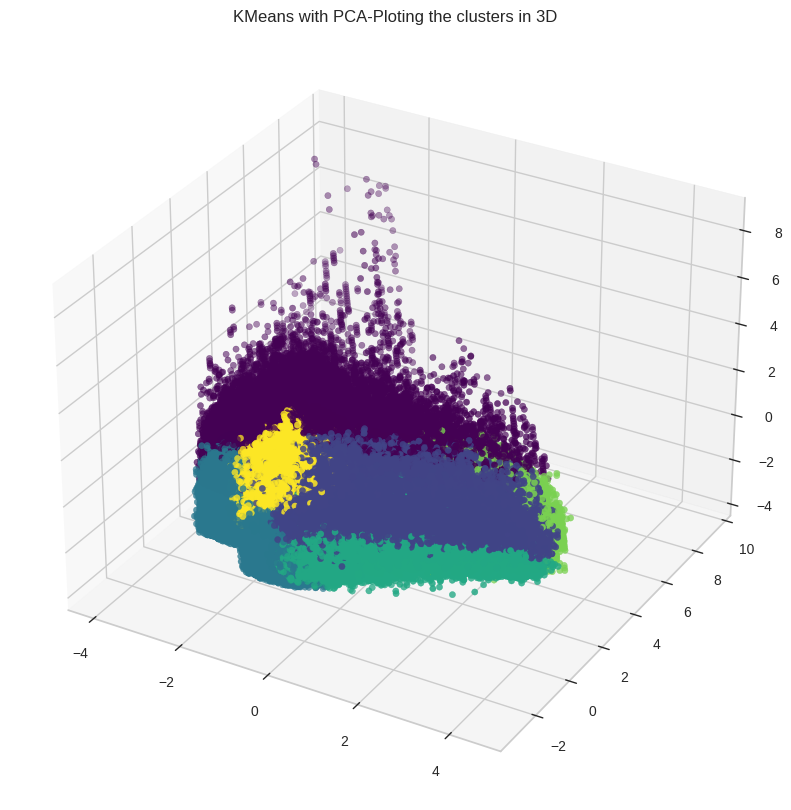

In [ ]:
fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(111, projection='3d')
plt.title('KMeans with PCA-Ploting the clusters in 3D')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=kmeans.labels_, cmap='viridis')
plt.show()
